<a href="https://colab.research.google.com/github/jeremymolina/ulead-2023-lll-BCD3103/blob/main/PCA_jeremy_spotify_dataset_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                 track_id             playlist_id            date_added  \
0  67sypabMU2RWSINGPRT5mV  07zqCIPCroFMKSajvERGvE  2016-11-02T16:13:18Z   
1  0rMGFZarxz3rnyt68cHfm6  07zqCIPCroFMKSajvERGvE  2016-11-07T05:30:42Z   
2  0nPlbGi675iDCppDNjpl6e  07zqCIPCroFMKSajvERGvE  2016-11-13T07:00:02Z   
3  1QMwFv4b7IPbzLTfbp1nPt  07zqCIPCroFMKSajvERGvE  2016-11-20T17:40:40Z   
4  5nyUqodtLIP5Ncuv2hc10k  07zqCIPCroFMKSajvERGvE  2016-11-24T00:51:16Z   

              track_name     first_artist  danceability  energy  key  \
0  Kids On the Boardwalk        Hop Along         0.559  0.5890    6   
1       Trouble Found Me        Hop Along         0.430  0.0772    0   
2   Here Comes a Thought      Samishiiinu         0.322  0.1820    5   
3                 Denial  Mannequin Pussy         0.382  0.9120    4   
4  Passing By - Original           Yiruma         0.275  0.1570    2   

   loudness  mode  ...                                   uri  \
0    -7.270     1  ...  spotify:track:67sypabMU2RWSI

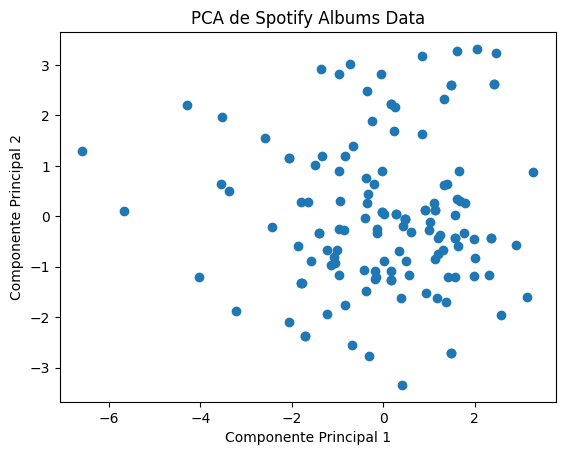

In [2]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('https://raw.githubusercontent.com/rileynwong/spotify-analysis/master/data.csv')

# Leer las columnas (primera fila) para entender la estructura de los datos
print(df.head())

# Eliminar valores infinitos ya que causan que la matrix y los coeficientes no se puedan calcular
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True) # Esto elimina las filas en que los valores son indefinidos


# X debe ser unicamente numeros y sin la columna de etiquetas para normalizar y procesar
X = df.select_dtypes(include=[np.number])

# Normalizar los datos
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Calcular la matriz de covarianza
cov_matrix = np.cov(X_normalized, rowvar=False)

# Eigenvectores y Eigenvalores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordenar Eigenvalores y Eigenvectores
indexes = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[indexes]
eigenvectors = eigenvectors[:,indexes]

# Elegir los primeros N eigenvectores
n_components = 2
selected_vectors = eigenvectors[:, :n_components]

# Proyectar los datos
X_pca = np.dot(X_normalized, selected_vectors)

# Visualizar los datos
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA de Spotify Albums Data')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()
